# Import Library

In [1]:
from __future__ import print_function
from numpy.random import seed
import random
import tensorflow as tf

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)

import os
os.environ['PYTHONHASHSEED'] = '0'
seed(42)
random.seed(12345)
session_conf =  tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)

from keras import backend as K
tf.random.set_seed(1234)

import tensorflow as tf
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)


from numpy import array
from numpy import hstack
import keras
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import keras.backend as K
from keras_tqdm import TQDMNotebookCallback
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
from keras.callbacks import History
from numpy import array
from numpy import hstack
import keras
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import keras.backend as K
from keras_tqdm import TQDMNotebookCallback
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
from keras.callbacks import History


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Import File

In [2]:
df = pd.read_csv('gold_price_update2.csv')

In [3]:
df

,date,price
0,4-Jan-10,17500
1,5-Jan-10,17650
2,6-Jan-10,17600
3,7-Jan-10,17700
4,8-Jan-10,17600
...,...,...
3892,26-Sep-22,29450
3893,27-Sep-22,29400
3894,28-Sep-22,29400
3895,29-Sep-22,29700


In [4]:
df.columns = ['date', 'price']
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
dataset=df
dataset

,price
date,
2010-01-04,17500
2010-01-05,17650
2010-01-06,17600
2010-01-07,17700
2010-01-08,17600
...,...
2022-09-26,29450
2022-09-27,29400
2022-09-28,29400


In [5]:
dataset=np.array(dataset)
dataset

array([[17500],
       [17650],
       [17600],
       ...,
       [29400],
       [29700],
       [29800]], dtype=int64)

# Data Set 13 วัน

In [6]:
dataset_X,dataset_Y= [],[]
for i in range(13,len(dataset)):
    dataset_X.append(dataset[i-13:i,0])
    dataset_Y.append(dataset[i,0])

dataset_X,dataset_Y=np.array(dataset_X),np.array(dataset_Y)
# Reshape the data 


In [7]:
dataset_X.shape

(3884, 13)

In [8]:
dataset_X=dataset_X.reshape(3884,13)
dataset_X=pd.DataFrame(dataset_X)

In [9]:
dataset_X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,17500,17650,17600,17700,17600,17750,18000,18000,17700,17700,17650,17600,17650
1,17650,17600,17700,17600,17750,18000,18000,17700,17700,17650,17600,17650,17650
2,17600,17700,17600,17750,18000,18000,17700,17700,17650,17600,17650,17650,17600
3,17700,17600,17750,18000,18000,17700,17700,17650,17600,17650,17650,17600,17300
4,17600,17750,18000,18000,17700,17700,17650,17600,17650,17650,17600,17300,17150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3879,29650,29700,29650,29600,29450,29200,29350,29200,29250,29400,29500,29450,29400
3880,29700,29650,29600,29450,29200,29350,29200,29250,29400,29500,29450,29400,29450
3881,29650,29600,29450,29200,29350,29200,29250,29400,29500,29450,29400,29450,29400
3882,29600,29450,29200,29350,29200,29250,29400,29500,29450,29400,29450,29400,29400


In [10]:
dataset_Y.shape

(3884,)

In [11]:
#สร้าง Dataset_Y
dataset_Y=dataset_Y.reshape(3884,1)

dataset_Y=pd.DataFrame(dataset_Y)

In [12]:

dataset_Y

,0
0,17650
1,17600
2,17300
3,17150
4,17150
...,...
3879,29450
3880,29400
3881,29400
3882,29700


In [13]:
#ทำการแบ่ง Train และ Test 70:30

train_ratio = .7 
train_x = dataset_X[:2718]
train_y =dataset_Y[:2718]
test_x= dataset_X[2718:]
test_y= dataset_Y[2718:]
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((2718, 13), (2718, 1), (1166, 13), (1166, 1))

In [14]:
#ทำการแปลง train_x,train_y,test_x,test_y เป็น array

train_x = np.array(train_x)
train_y =np.array(train_y)
test_x=np.array(test_x)
test_y= np.array(test_y)
train_x=train_x.reshape(2718,13)
train_y=train_y.reshape(2718,1)
test_x=test_x.reshape(1166,13)
test_y=test_y.reshape(1166,1)

In [15]:
#ทำการ Rescale

from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(train_x)
scalery = StandardScaler().fit(train_y)
train_x = scalerX.transform(train_x)
train_y = scalery.transform(train_y)
test_x = scalerX.transform(test_x)
test_y = scalery.transform(test_y)

In [16]:
# LSTM Model
import tensorflow as tf
from keras.layers import Dense, LSTM
K.clear_session()
model = Sequential()
model.add(LSTM(50, input_shape=(13,1 )))
model.add(Dense(1))

adam = tf.keras.optimizers.Adam(learning_rate=0.001,name="Adam")
model.compile(loss='mean_absolute_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [17]:
# แปลงข้อมูล -3มิติ
train_x=train_x.reshape(2718,13,1)
train_y=train_y.reshape(-1)
test_x=test_x.reshape(1166,13,1)
test_y=test_y.reshape(-1)

>>>>> Training Time >>>> 9.553100347518921 seconds


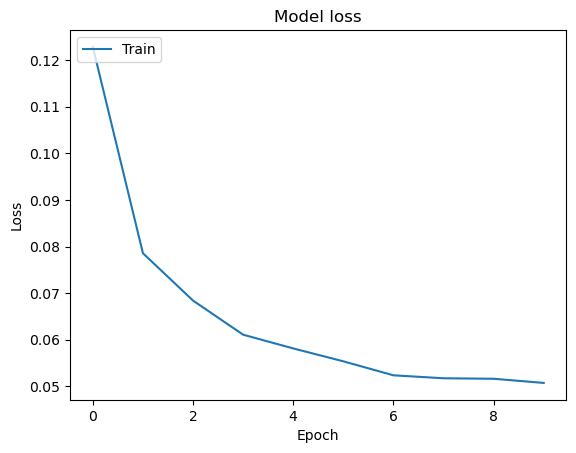

In [18]:

import sys,os,time,datetime
start_tm = time.time()

history = model.fit(train_x, train_y,
          epochs=10, batch_size=10, verbose=0 
          )
print(f">>>>> Training Time >>>> {time.time() - start_tm} seconds")
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [19]:
y_pred_lstm = model.predict(test_x)

37/37 [==============================] - 0s 1ms/step


In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(f'MAE:  {mean_absolute_error(test_y,y_pred_lstm)}')
print(f'MSE:{np.sqrt(mean_squared_error(test_y,y_pred_lstm))}')
print(f'R-Squrea:{r2_score(test_y,y_pred_lstm)}')
print(f'MAPE: {np.mean(np.abs((test_y - y_pred_lstm)/test_y))*100}')




MAE:  0.10689170036844359
MSE:0.15432863578290792
R-Squrea:0.9918685187948322
MAPE: 406.71198156436265


In [21]:
from sklearn.preprocessing import StandardScaler
y_pred_lstm_real=scalery.inverse_transform(y_pred_lstm)

In [22]:
test_y_real = scalery.inverse_transform(test_y.reshape(1166,1))

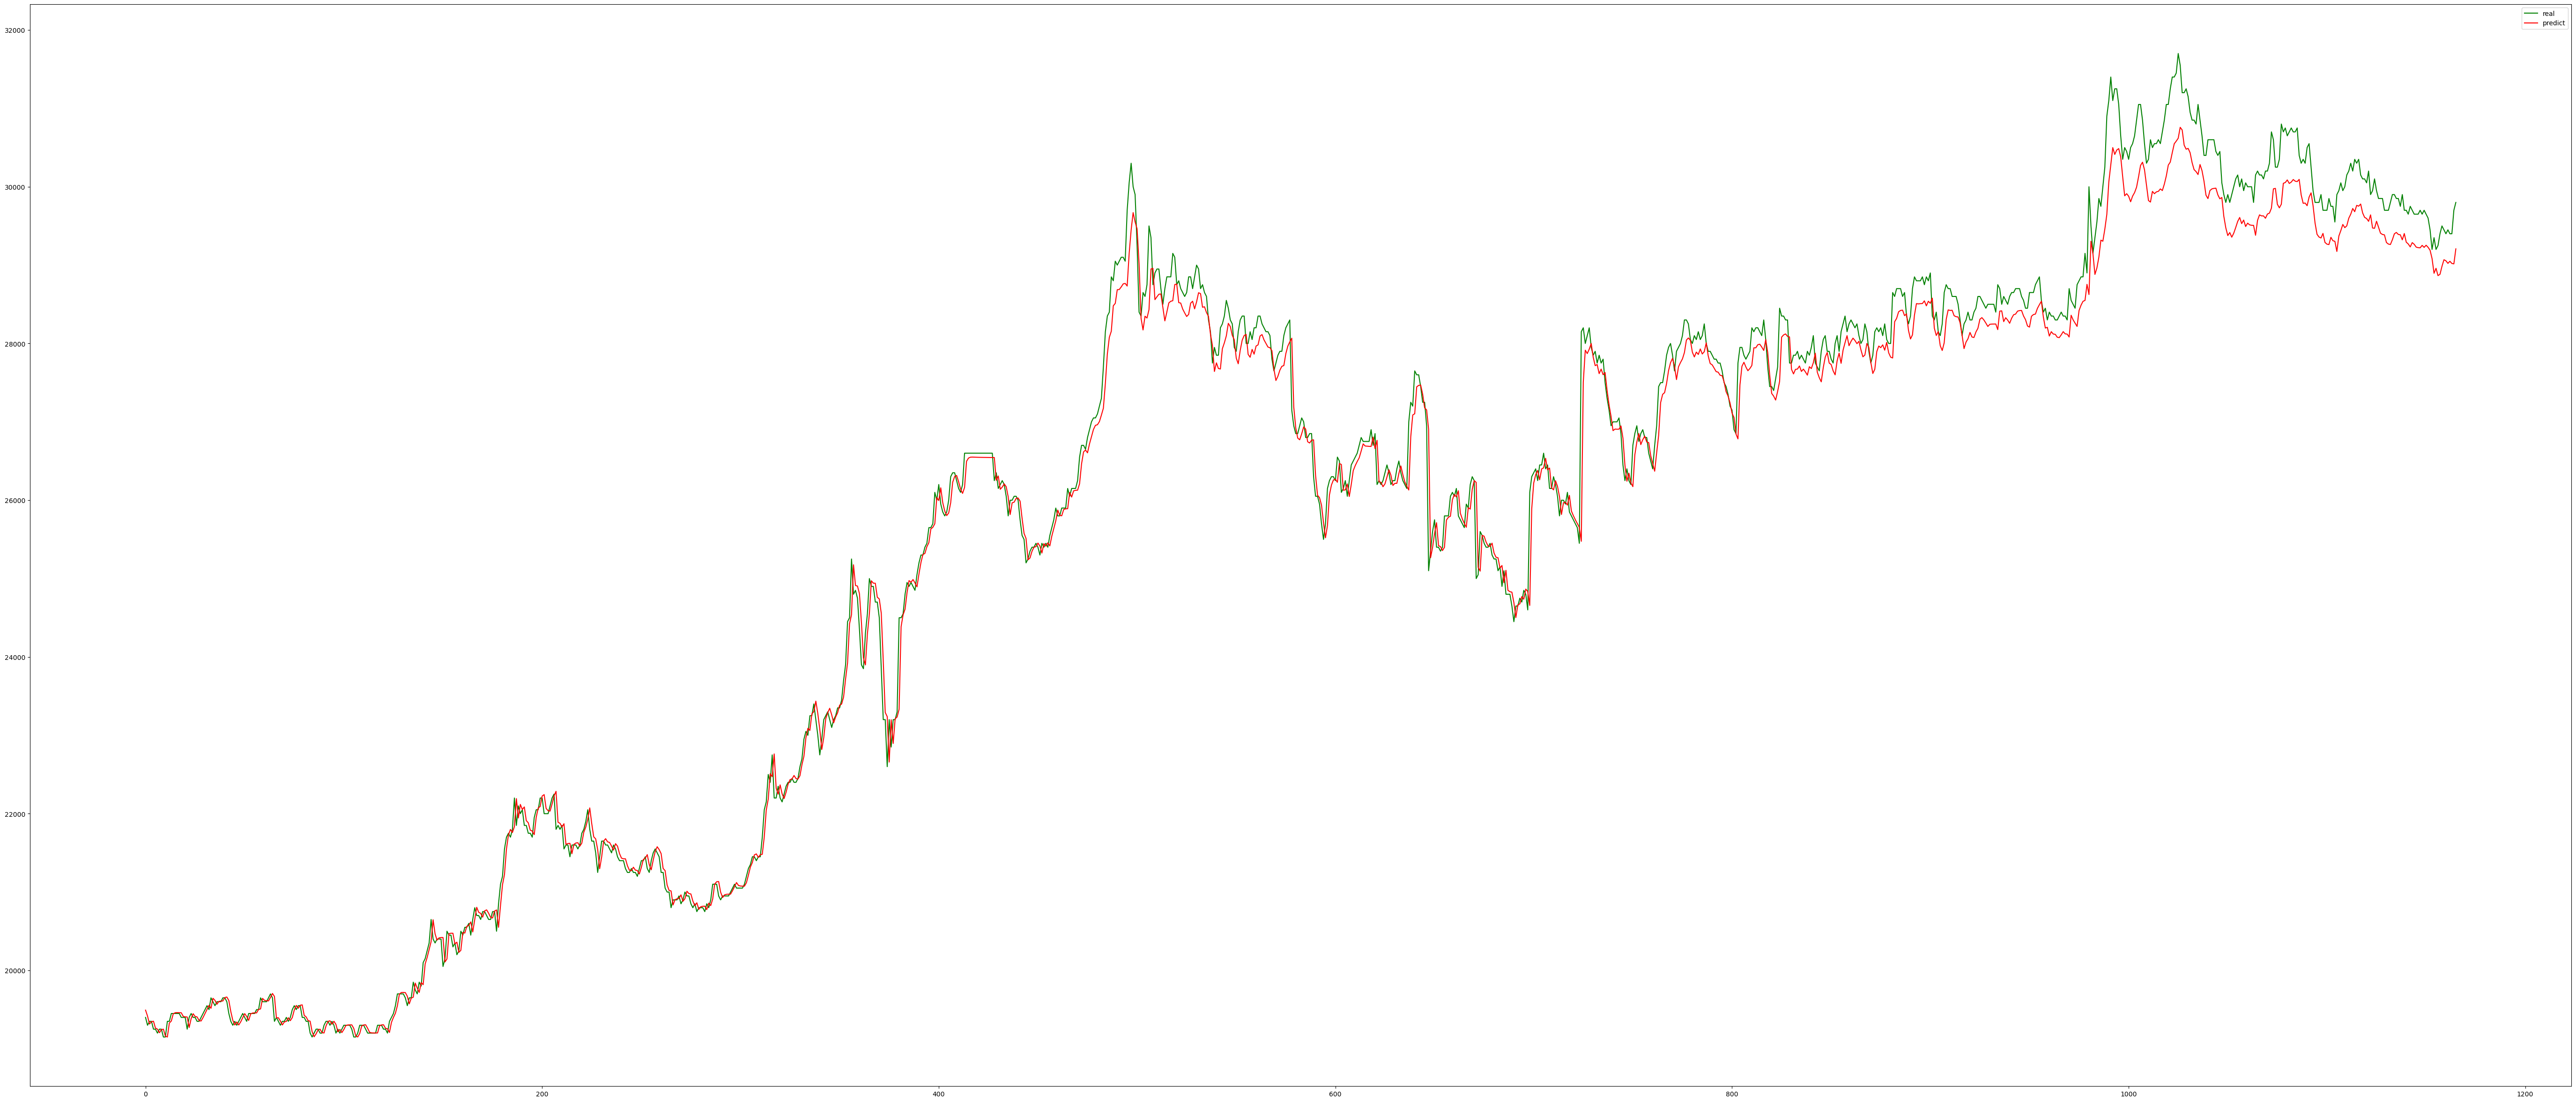

In [23]:

plt.figure(figsize=(70, 30))
plt.plot(test_y_real,color ="green")
plt.plot(y_pred_lstm_real,color ='red')
plt.legend(['real', 'predict',])

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(f'MAE:  {mean_absolute_error(test_y_real,y_pred_lstm_real)}')
print(f'MSE:{np.sqrt(mean_squared_error(test_y_real,y_pred_lstm_real))}')
print(f'R-Squrea:{r2_score(test_y_real,y_pred_lstm_real)}')
print(f'MAPE: {np.mean(np.abs((test_y_real - y_pred_lstm_real)/test_y_real))*100}')



MAE:  230.10786576704547
MSE:332.22630413006596
R-Squrea:0.991868514929974
MAPE: 0.8375542549887066


In [25]:
pd.DataFrame(y_pred_lstm_real).to_csv('lstm16.csv')
pd.DataFrame(test_y_real ).to_csv('lstm16_real.csv')

In [26]:
from keras.models import load_model
model.save('model_LSTM.h5')
model_LSTM = load_model('model_LSTM.h5')